## Wine_dataset Clustering - (Kmeans and Hierachal methods)

These data are the results of a chemical analysis of wines grown in the same region in Italy.

The attributes are:

* Alcohol           

* Malic acid

* Ash    

* Alcalinity of ash 

* Magnesium          

* Total phenols 

* Flavanoids         

* Nonflavanoid phenols  

* Proanthocyanins   

* Color intensity 

* Hue              

* OD280/OD315 of diluted wines 

* Proline

## Notebook Summary
   * Loading and Understanding the dataset
   * Exploratory Data Analysis
   * Preparing Data
   * Clustering
  
     * K - means Clustering Methods
    
     * Hierarchical Clustering Methods
          
         * Agglomerative Clustering
            

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Loading and Understanding the dataset

In [2]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
# to check the missing value
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2) Exploratory Data Analysis

#### Simple Distribution Plots for all Features

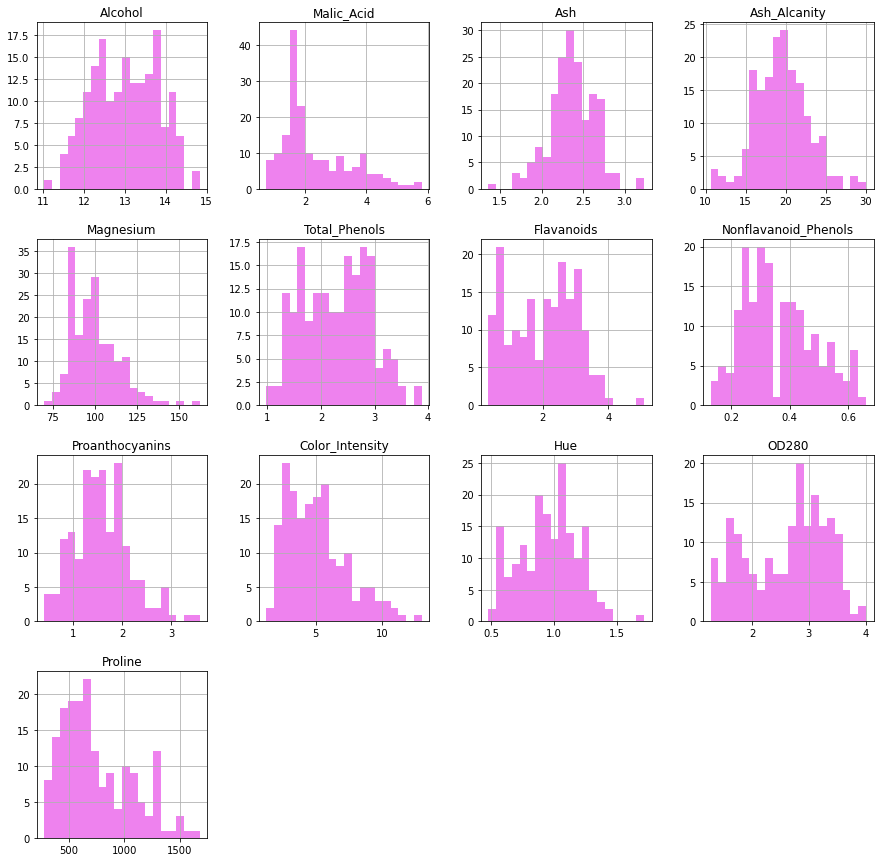

In [7]:
plt.rcParams["figure.figsize"] = (15, 15)
data.hist(bins=20,color = 'violet')
plt.show()

<AxesSubplot:>

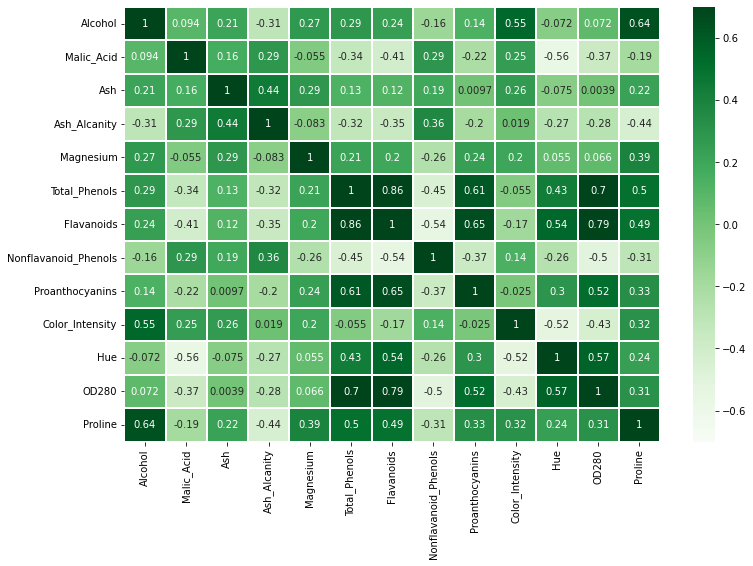

In [8]:
corrmatrix = data.corr()
plt.subplots(figsize =(12,8))
sns.heatmap(corrmatrix,vmin = -0.7,vmax = 0.7,annot = True,linewidth =0.2,cmap='Greens')

#### Outlier Visualization

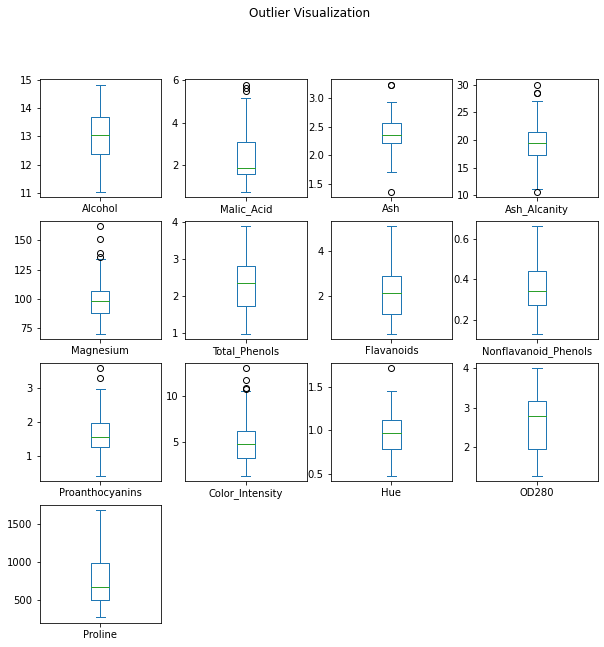

In [9]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10), title='Outlier Visualization')
plt.show()

## 3)  Preparing Data

### Normalization

In [10]:
from sklearn import preprocessing
data = preprocessing.normalize(data)

## 4) Clustering

### a) K - mean clustering

C:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03969232820057102
0.031232108968648233
0.027180954089528406
0.023664665162120284
0.020448724450857582
0.01853787449801328


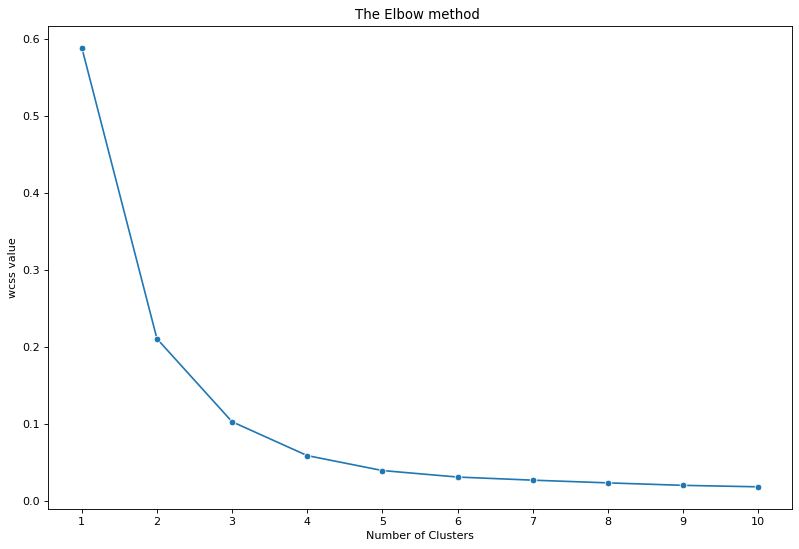

In [11]:
# First we have to find the number of clusters by using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append([i, kmeans.inertia_])
    print(kmeans.inertia_)
    wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])
# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.title('The Elbow method ')
plt.xticks(np.arange(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('wcss value')
plt.show()


#### From Elbow Method it is Clear that we have 3 Clusters

In [12]:
#k-means
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)
type(data)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0 0 1 1 1 1 0 2 0 1 1
 2 0 0 0 1 0 0 2 1 1 1 0 1 1 2 2 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 0 0 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


numpy.ndarray

#### Evaluation Metrics

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
# Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(data,y_kmeans)
print(silhouette_avg1)

0.5233461282286352


### 3)Hierachal clustering

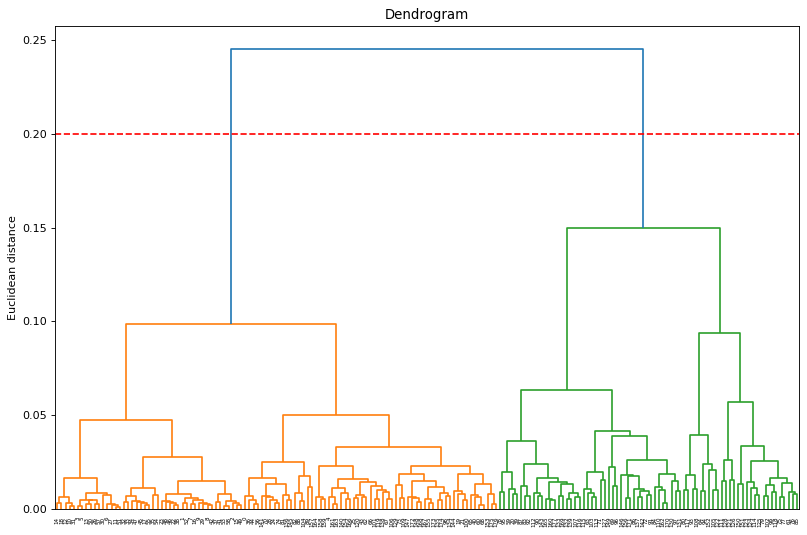

In [15]:
# using the dendrograms to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data,method = 'complete'))
plt.hlines(0.20,0,5000,colors = 'r',linestyle = 'dashed')
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

#### The vertical line corresponding to the Eulidedian distance 0.15 shows that how many clusters are there in the hierarchal clustering.Here, there are 2 clusters.

#### Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'complete')
y_hc = hc.fit_predict(data)

In [17]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

#### Evaluation Metrics

In [18]:
from sklearn.metrics import silhouette_score
# Silhouette score of agglomerative clustering
silhouette_avg2 = silhouette_score(data,y_hc)
print(silhouette_avg2)

0.5317187487677043
